# Cluster Size Recoomendation

Checking inertia and silhouette scores<br>
Inertia: how close a point is to the cluster's centroid.<br>
Silhouette: how far is each centroid to other centroids

This study was inspired by NeuralNine's excellent [tutorial](https://www.youtube.com/watch?v=ARjx__t5OCI&list=WL&index=43)

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

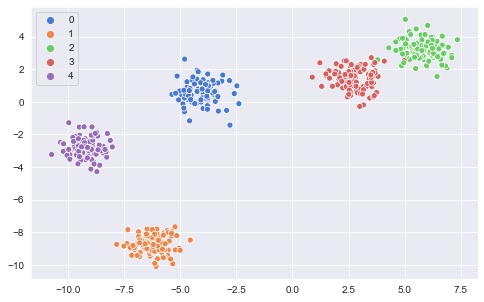

In [93]:
fig, ax = plt.subplots(figsize=(8, 5))
X,y = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=17)
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='muted', markers=True)
plt.show()

In [100]:
cluster_numbers = [2,3,4,5,6,7,8,9,10,11,12]
inertia=[]
silhouette_scores = []
for k in cluster_numbers:
    kmeans = KMeans(n_clusters=k, random_state=17).fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

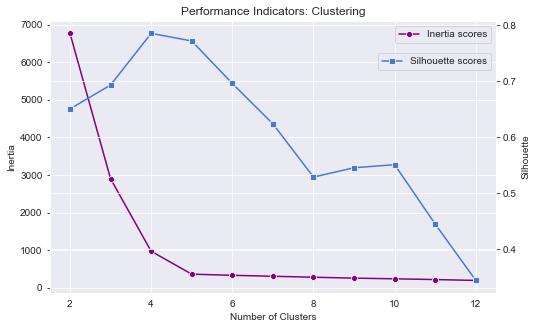

In [101]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.lineplot(x=cluster_numbers, y=inertia, ax=ax1, label='Inertia scores', marker='o',color='purple')
ax2 = ax1.twinx()
sns.lineplot(x=cluster_numbers, y=silhouette_scores, ax=ax2, label='Silhouette scores', marker='s')
ax1.set(xlabel='Number of Clusters', ylabel='Inertia')
ax2.set(ylabel='Silhouette')
plt.title('Performance Indicators: Clustering')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right',bbox_to_anchor=(1, .9))
plt.show()

We can see an obvious flattening of the inertia curve for k=5 clusters, as well as a peak for the silhouette score between k=4 and k=5 clusters

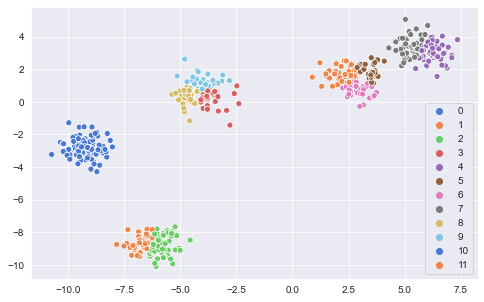

In [102]:
k=12
kmeans = KMeans(n_clusters=k, random_state=17).fit(X)
fig, ax = plt.subplots(figsize=(8, 5))
X,y = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=17)
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans.labels_, palette='muted', markers=True)
plt.show()